In [1]:
#imprt dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# load the data
credit = pd.read_csv("creditcard.csv")
credit.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# data info
credit.info() #data lacks missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#check for missing values in each column
credit.isnull().sum().head()

Time    0
V1      0
V2      0
V3      0
V4      0
dtype: int64

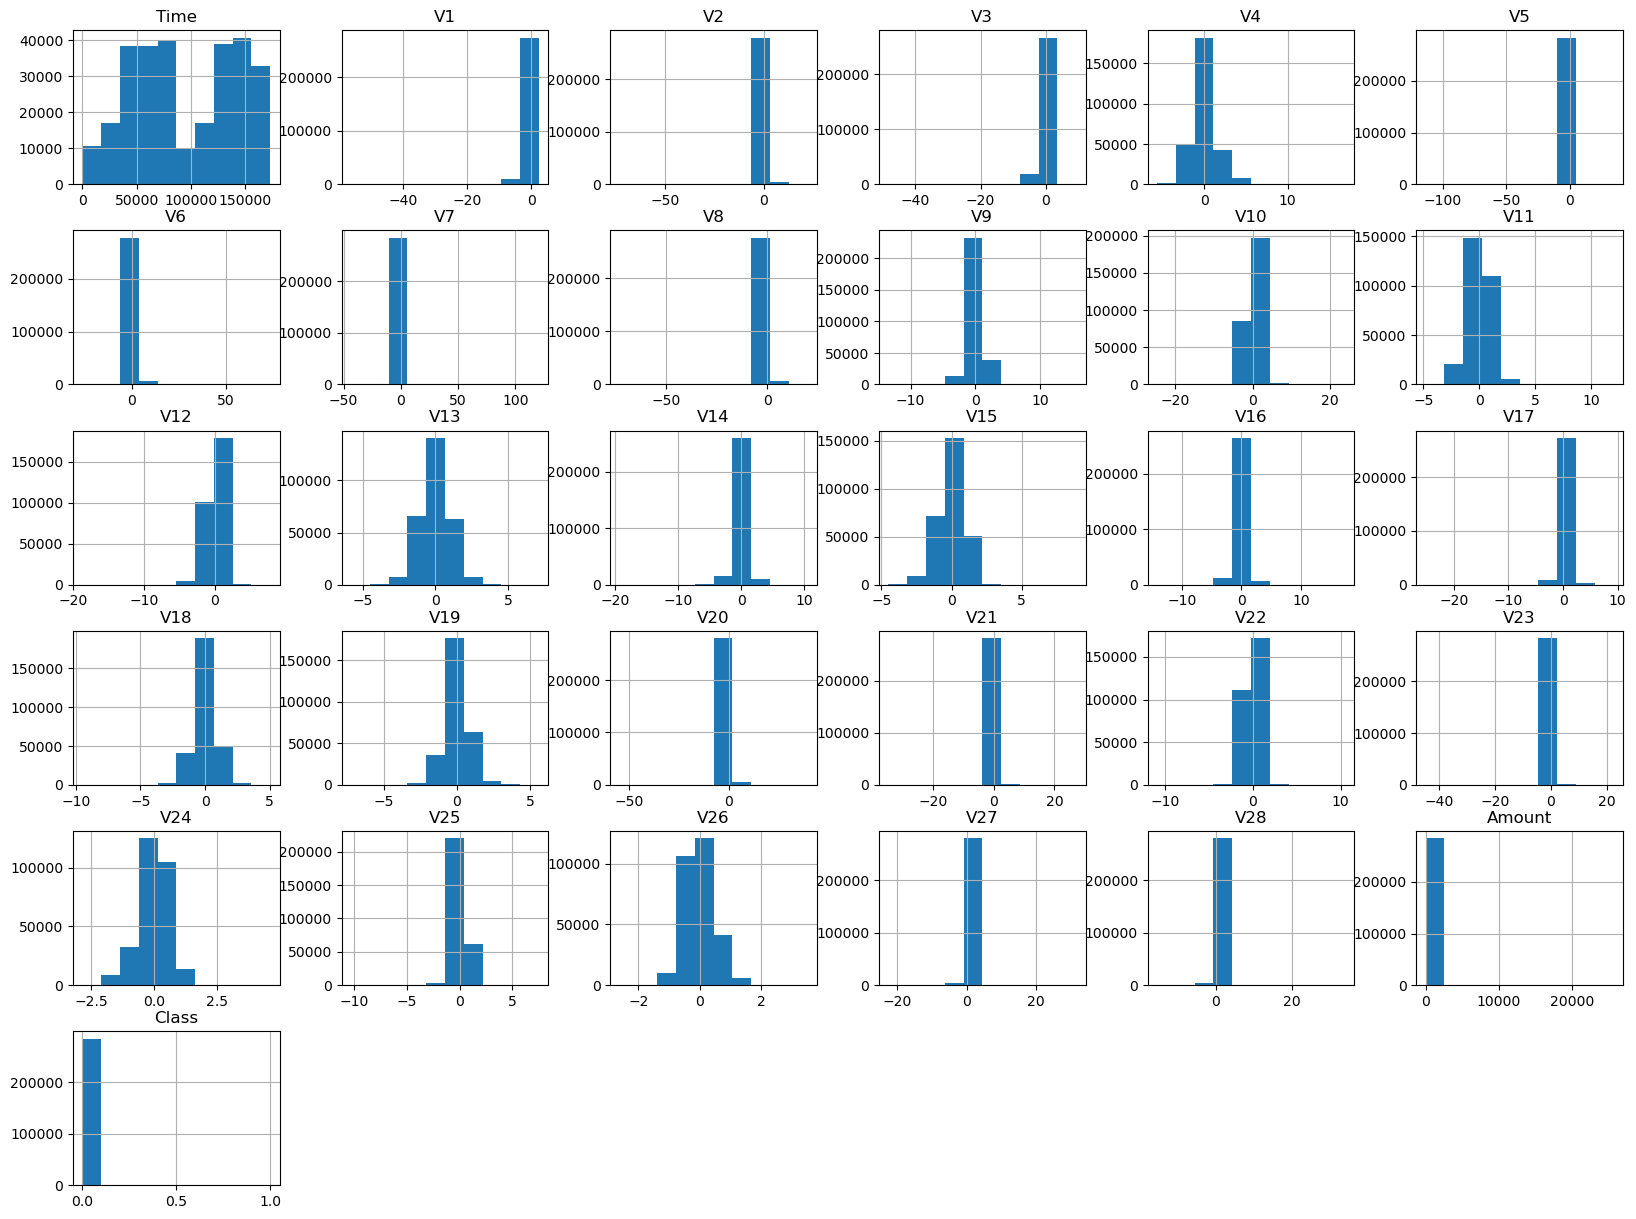

In [7]:
#plot histograms of the whole data
credit.hist(figsize = (20,15))
plt.show()

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


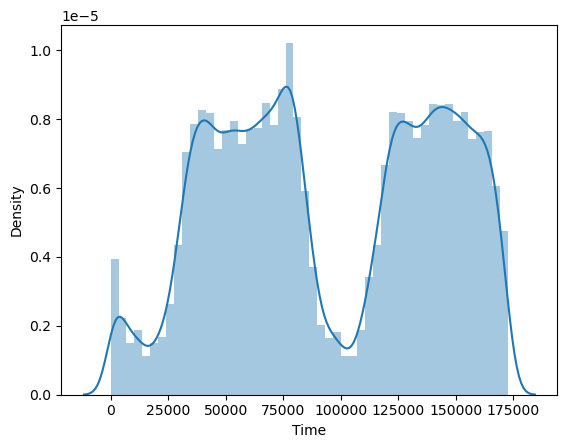

In [8]:
import seaborn as sns
sns.distplot(credit['Time'])
plt.show()

In [9]:
#pltting the times fraudalent transactions have occcured

fraud_times = credit[credit['Class']==1]['Time'].values
fraud_times_index = credit[credit['Class']==1]['Time'].index

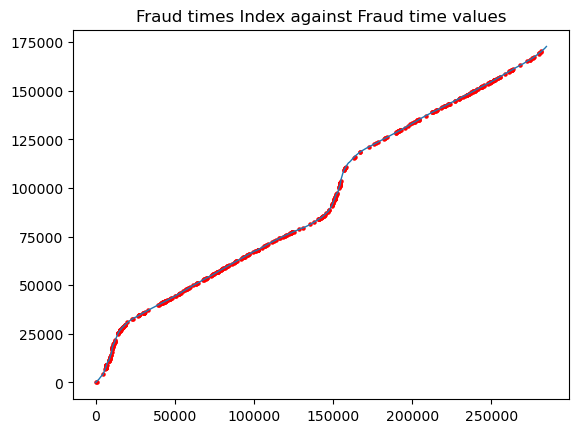

In [10]:
plt.scatter(x= fraud_times_index, y=fraud_times, color='red', marker='o', s=5)
plt.plot(credit['Time'], linewidth = 1)
plt.title("Fraud times Index against Fraud time values")
plt.show()

In [11]:
# check the distribution of legit n fraudalent transactions
credit['Class'].value_counts()
#there are 492 fraudalent transactions

0    284315
1       492
Name: Class, dtype: int64

In [12]:
#aggrregating the summary stats for fraudalent transactions
credit[credit['Class']==1][['Amount','Time']].agg(['mean', 'min','max', 'median'])

,Amount,Time
mean,122.211321,80746.806911
min,0.000000,406.000000
max,2125.870000,170348.000000
median,9.250000,75568.500000


In [13]:
# seperating data for analysis
legit = credit[credit.Class == 0]

fraud = credit[credit.Class == 1]

print("the shape of fraud data is;" ,legit.shape)
print("the shape of fraud data is;" ,fraud.shape)

the shape of fraud data is; (284315, 31)
the shape of fraud data is; (492, 31)


In [14]:
# compare the values for both transactions
credit.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


UNDER SAMPLING

Create a sample from the data

In [15]:
legit_sample = legit.sample(n = 492)

Create a dataset that concatenates both fraud and legit transactions. The sample set to 492 since the fraud data sums up to 492. We balanced the data

In [16]:
combo_dset = pd.concat([legit_sample, fraud], axis = 0)
combo_dset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
24776,33379.0,-2.866325,-1.605386,1.290458,0.714682,1.596265,-1.930423,0.386850,-0.062749,-0.127956,...,-0.115752,0.182560,1.540752,0.320399,1.278409,-0.317560,0.317058,-0.102420,50.36,0
281501,170219.0,0.055181,0.824805,-1.241402,-0.144379,0.195088,-0.843130,0.675176,0.298806,-0.288301,...,0.392485,0.921473,0.044720,-0.439532,-0.256538,-0.148941,-0.104970,-0.056591,85.25,0
175953,122568.0,2.178704,-1.829492,-0.307687,-1.777980,-1.572426,0.571871,-1.976530,0.286881,-0.759462,...,-0.081356,0.122120,0.263946,0.045033,-0.519360,-0.246085,0.046001,-0.033679,48.86,0
184706,126353.0,2.074045,0.609211,-3.071551,0.808518,0.985467,-1.806380,0.732120,-0.411139,0.192257,...,-0.054961,-0.008910,0.024384,0.882203,0.294787,0.665834,-0.086338,-0.012468,0.76,0
281975,170573.0,-0.390983,0.442848,1.545107,-0.765423,0.123726,0.167972,0.216841,0.193949,0.025181,...,0.292531,0.968271,-0.261144,-0.321122,-0.372327,0.538713,0.127278,0.146634,11.50,0


Find the correlation in the combo d_set

In [17]:
# we have a uniformly distributed data
combo_dset["Class"].value_counts()
corr_mat = combo_dset.corr()
corr_mat

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.260020,-0.227358,0.153996,-0.228770,0.278276,0.114948,0.226543,-0.134090,0.168954,...,-0.063153,0.157567,0.045978,-0.012369,-0.200450,-0.056626,-0.143105,0.014362,0.029601,-0.156885
V1,0.260020,1.000000,-0.779150,0.874383,-0.616827,0.853070,0.322316,0.882472,-0.082258,0.664859,...,0.016990,-0.020389,-0.041821,-0.071762,-0.079454,0.064977,0.196521,0.150766,-0.026171,-0.431053
V2,-0.227358,-0.779150,1.000000,-0.847909,0.669905,-0.791452,-0.261480,-0.834834,-0.017272,-0.702045,...,0.037949,-0.003658,0.167687,-0.003458,0.115508,0.007267,-0.140686,-0.007655,-0.257505,0.496637
V3,0.153996,0.874383,-0.847909,1.000000,-0.768861,0.851160,0.459538,0.886300,-0.171303,0.763493,...,0.028044,-0.053302,-0.035956,0.021672,-0.091554,-0.025320,0.102411,0.104194,-0.004154,-0.568193
V4,-0.228770,-0.616827,0.669905,-0.768861,1.000000,-0.568664,-0.420433,-0.715606,0.102624,-0.786840,...,-0.023477,0.091240,0.026547,-0.079934,-0.034284,0.135524,-0.006978,-0.070697,-0.014732,0.699692
V5,0.278276,0.853070,-0.791452,0.851160,-0.568664,1.000000,0.273109,0.831354,-0.201859,0.665638,...,0.048442,-0.093336,-0.088044,-0.131355,-0.083109,0.051889,0.180764,0.129016,-0.104997,-0.376152
V6,0.114948,0.322316,-0.261480,0.459538,-0.420433,0.273109,1.000000,0.287059,-0.565030,0.369516,...,0.020167,0.014216,0.294551,-0.033423,-0.155736,-0.068579,-0.176391,0.024192,0.170242,-0.390597
V7,0.226543,0.882472,-0.834834,0.886300,-0.715606,0.831354,0.287059,1.000000,0.083926,0.766825,...,0.039394,-0.100500,-0.101273,-0.036902,0.044198,0.021723,0.226378,0.148015,0.137822,-0.479595
V8,-0.134090,-0.082258,-0.017272,-0.171303,0.102624,-0.201859,-0.565030,0.083926,1.000000,-0.076092,...,-0.113637,0.035780,-0.402828,0.078747,0.236712,0.041653,0.288541,-0.019698,0.002309,0.055467
V9,0.168954,0.664859,-0.702045,0.763493,-0.786840,0.665638,0.369516,0.766825,-0.076092,1.000000,...,0.161842,-0.228522,-0.062408,0.020482,-0.024912,-0.129850,0.120494,0.127569,0.043097,-0.554192


In [20]:
corr_mat['Amount'].sort_values(ascending = False)

Amount    1.000000
V20       0.186924
V6        0.170242
V7        0.137822
V14       0.065171
V27       0.061677
V15       0.044233
V9        0.043097
V19       0.037970
Class     0.036904
V13       0.033626
V12       0.029935
Time      0.029601
V24       0.026492
V10       0.016900
V21       0.013001
V8        0.002309
V17       0.001110
V16      -0.001198
V3       -0.004154
V18      -0.004638
V4       -0.014732
V28      -0.022597
V1       -0.026171
V22      -0.029399
V11      -0.040338
V26      -0.041923
V5       -0.104997
V25      -0.127511
V23      -0.226766
V2       -0.257505
Name: Amount, dtype: float64

In [18]:
combo_dset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95824.581301,-0.025934,-0.100859,0.042581,0.115505,0.023953,-0.026248,0.058240,0.033508,-0.032563,...,0.003532,0.021057,0.060564,-0.045896,0.00996,-0.017892,-0.014131,-0.012070,0.001823,102.460244
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
x = combo_dset.drop(columns="Class", axis=1) # features
y = combo_dset["Class"] #targets / labels

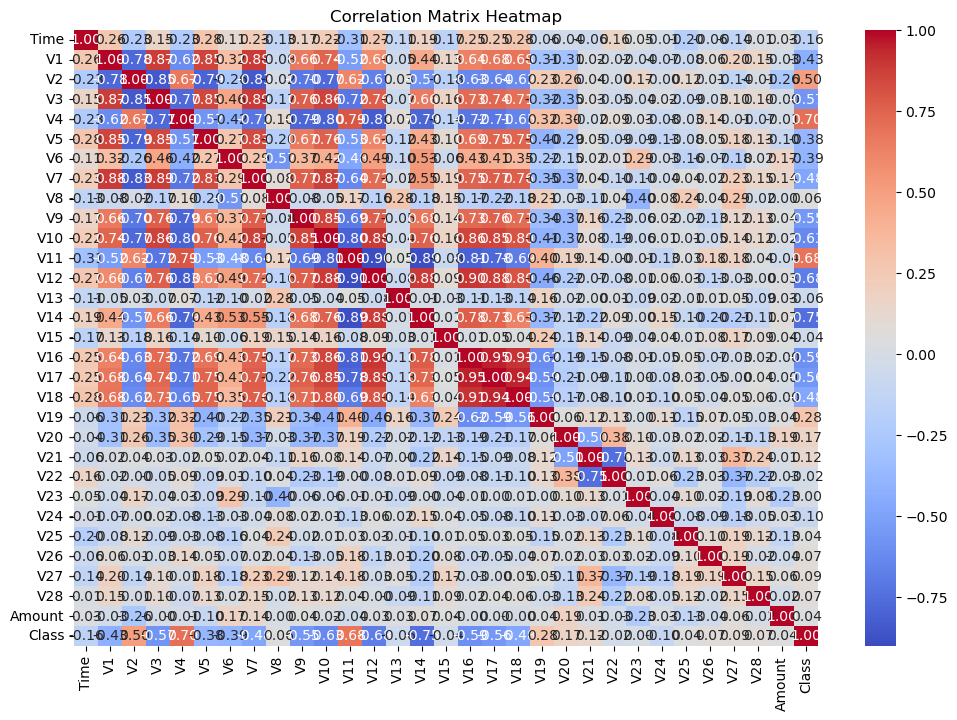

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [22]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
24776,33379.0,-2.866325,-1.605386,1.290458,0.714682,1.596265,-1.930423,0.386850,-0.062749,-0.127956,...,-0.295517,-0.115752,0.182560,1.540752,0.320399,1.278409,-0.317560,0.317058,-0.102420,50.36
281501,170219.0,0.055181,0.824805,-1.241402,-0.144379,0.195088,-0.843130,0.675176,0.298806,-0.288301,...,-0.115790,0.392485,0.921473,0.044720,-0.439532,-0.256538,-0.148941,-0.104970,-0.056591,85.25
175953,122568.0,2.178704,-1.829492,-0.307687,-1.777980,-1.572426,0.571871,-1.976530,0.286881,-0.759462,...,-0.325163,-0.081356,0.122120,0.263946,0.045033,-0.519360,-0.246085,0.046001,-0.033679,48.86
184706,126353.0,2.074045,0.609211,-3.071551,0.808518,0.985467,-1.806380,0.732120,-0.411139,0.192257,...,-0.226956,-0.054961,-0.008910,0.024384,0.882203,0.294787,0.665834,-0.086338,-0.012468,0.76
281975,170573.0,-0.390983,0.442848,1.545107,-0.765423,0.123726,0.167972,0.216841,0.193949,0.025181,...,-0.037551,0.292531,0.968271,-0.261144,-0.321122,-0.372327,0.538713,0.127278,0.146634,11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [23]:
y

24776     0
281501    0
175953    0
184706    0
281975    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

Train test and split data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [25]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


Model fitting

In [26]:
model = LogisticRegression()


In [27]:
#training the Log Reg model with training data
model.fit(x_train, y_train)

LogisticRegression()

Accuracy score finding

In [28]:
#accuracy on training data
x_train_pred = model.predict(x_train) #all labels f the training data
training_data_accuracy = accuracy_score(x_train_pred, y_train)

In [29]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.9377382465057179


In [30]:
# accuracy on test data
x_test_pred = model.predict(x_test) #all labels f the training data
testing_data_accuracy = accuracy_score(x_test_pred, y_test)

In [31]:
print("Accuracy on training data : ", testing_data_accuracy)

Accuracy on training data :  0.934010152284264
